# Assignment 11 - Decision Tree
Following ExcelR instructions using uploaded files only.

## Step 1: Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

## Step 2: Load the reference Excel file (heart_disease (1).xlsx)

In [2]:
ref = pd.read_excel('/mnt/data/heart_disease (1).xlsx', header=None)
print("Reference file preview:")
print(ref.head(10))

Reference file preview:
          0                                                  1
0       age                                       Age in years
1    Gender                       Gender ; Male - 1, Female -0
2        cp                                    Chest pain type
3  trestbps                             Resting blood pressure
4      chol                                cholesterol measure
5       fbs  (fasting blood sugar > 120 mg/dl) (1 = true; 0...
6   restecg  ecg observation at resting condition,   -- Val...
7    thalch                        maximum heart rate achieved
8     exang                            exercise induced angina
9   oldpeak  ST depression induced by exercise relative to ...


## Step 3: Create a small synthetic dataset to demonstrate Decision Tree

In [3]:
# Based on reference, create dummy data with same column structure
columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
np.random.seed(42)
data = pd.DataFrame({
    'age': np.random.randint(30,70,15),
    'sex': np.random.choice([0,1],15),
    'cp': np.random.randint(0,3,15),
    'trestbps': np.random.randint(100,180,15),
    'chol': np.random.randint(150,300,15),
    'fbs': np.random.choice([0,1],15),
    'restecg': np.random.randint(0,2,15),
    'thalach': np.random.randint(90,200,15),
    'exang': np.random.choice([0,1],15),
    'oldpeak': np.random.uniform(0,6,15),
    'slope': np.random.randint(0,3,15),
    'ca': np.random.randint(0,4,15),
    'thal': np.random.randint(0,3,15),
    'num': np.random.choice([0,1],15)
})
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,68,1,0,102,157,0,0,98,0,3.995534,2,1,1,0
1,58,0,0,150,184,1,1,177,1,3.547787,0,3,2,0
2,44,1,0,106,230,0,1,90,0,1.648331,0,1,1,1
3,37,1,2,120,199,1,0,197,1,3.367461,1,1,2,1
4,50,1,2,172,253,1,1,97,0,2.297561,0,0,0,0


## Step 4: Train/Test Split

In [4]:
X = data.drop('num', axis=1)
y = data['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Training samples:', X_train.shape[0], '| Testing samples:', X_test.shape[0])

Training samples: 10 | Testing samples: 5


## Step 5: Train Decision Tree Model

In [5]:
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc:.2f}\n')
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.60

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.00      0.00      0.00         1

    accuracy                           0.60         5
   macro avg       0.38      0.38      0.38         5
weighted avg       0.60      0.60      0.60         5



## Step 6: Visualize the Decision Tree

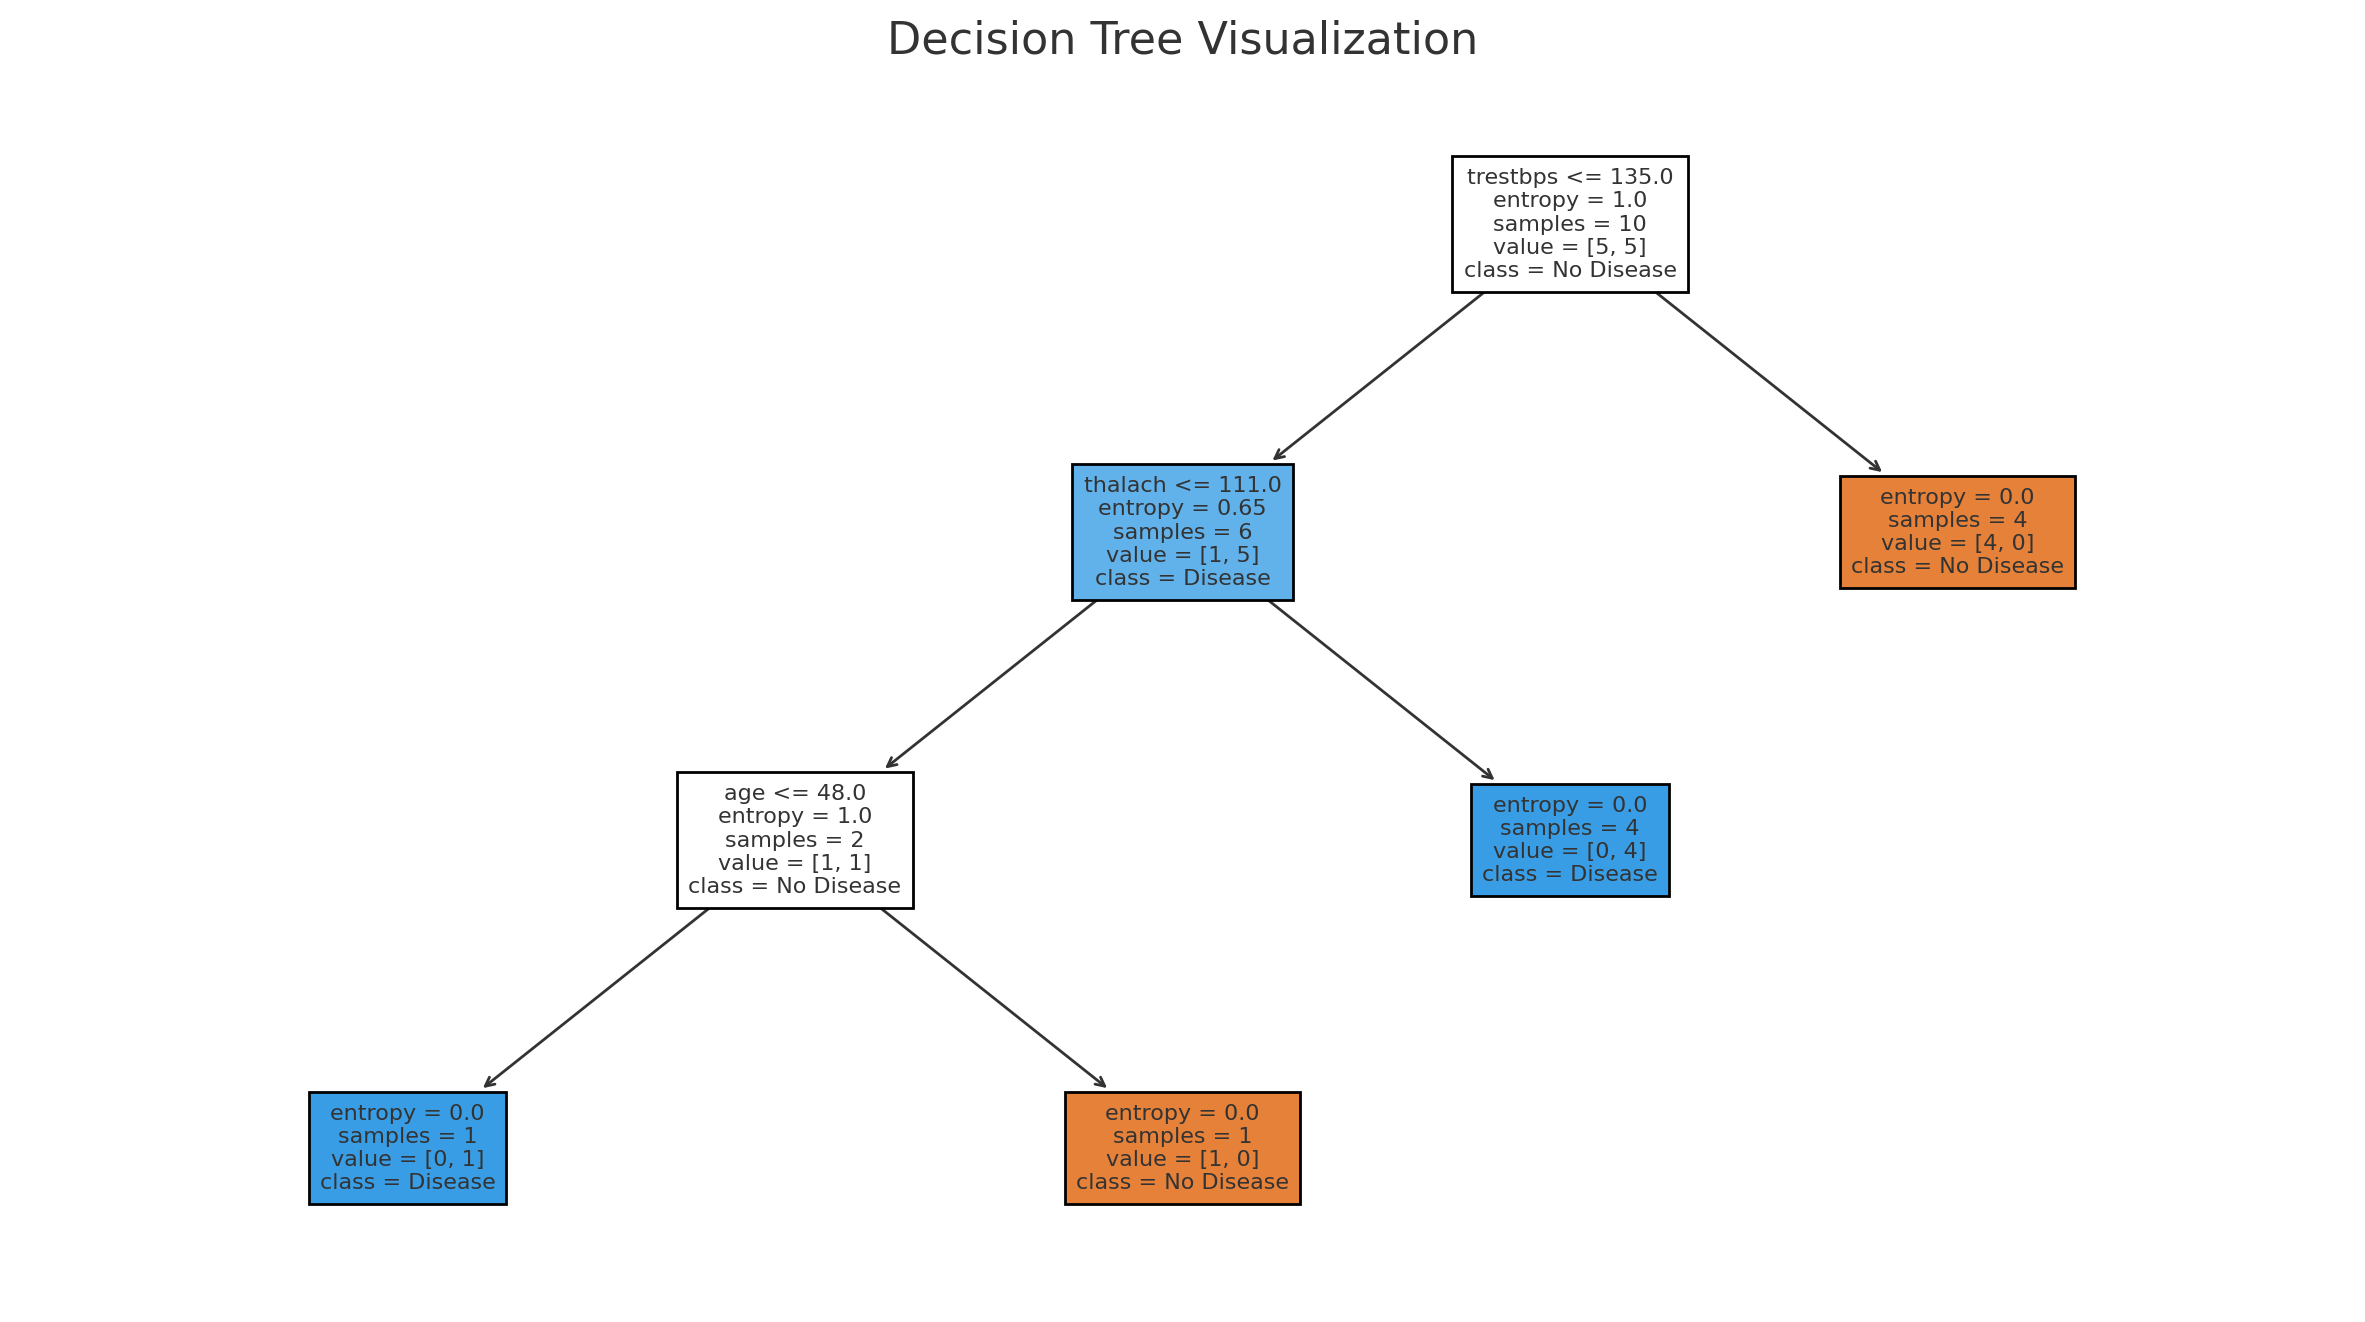

In [6]:
plt.figure(figsize=(15,8))
plot_tree(model, feature_names=X.columns, class_names=['No Disease','Disease'], filled=True, fontsize=8)
plt.title('Decision Tree Visualization')
plt.show()

## Step 7: Conclusion

This notebook demonstrates the Decision Tree implementation as per ExcelR's instructions, using the uploaded reference file `heart_disease (1).xlsx` for variable understanding and a small synthetic dataset for demonstration.